In [1]:
import os
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_list = ["./data/" + i for i in os.listdir("./data")]
folder_list = ["./train/" + i for i in os.listdir("./train")]

In [ ]:
def empty(a):
    pass

def imgResize(image):
    h, w, c = image.shape
    w_max = 1280
    h_max = 720
    if h <= h_max & w <= w_max:
        return image
    elif w / h >= w_max / h_max:
        return cv2.resize(image, (w_max, int(h * w_max / w)))
    else:
        return cv2.resize(image, (int(w * h_max / h), h_max))
    
def label(img_name, folder_name):
    img = cv2.imread(img_name)
    
    x = y = w = 0
    h, w, c = img.shape
    cv2.namedWindow('TrackBar')
    cv2.resizeWindow('TrackBar', 1280, 160)
    cv2.createTrackbar('x', 'TrackBar', 0, h - 50, empty)
    cv2.createTrackbar('y', 'TrackBar', 0, w - 50, empty)
    cv2.createTrackbar('w', 'TrackBar', 30, 60, empty)
    
    while True:
        x = cv2.getTrackbarPos('x', 'TrackBar')
        y = cv2.getTrackbarPos('y', 'TrackBar')
        w = cv2.getTrackbarPos('w', 'TrackBar')
        output = copy.deepcopy(img)
        cv2.rectangle(output, (y, x), (y+w, x+w), (255, 0, 255), 3)
        cv2.imshow('mask', imgResize(output))
        cv2.imshow('rec', cv2.resize(img[x:x+w+1, y:y+w+1], (100, 100)))
        if(cv2.waitKey(10) == 27): # esc to switch to next image
            break
        
    coord = open(folder_name + '/coord.txt', 'w')
    coord.write("{} {} {}".format(x, y, w))
    coord.close()
    
    cv2.imwrite(folder_name + '/wally/wally.jpg', img[x:x+w+1, y:y+w+1])
    
    cv2.destroyAllWindows()
    return x, y, w

---
### label Wally

In [ ]:
for i, j in zip(img_list, folder_list):
    x, y, w = label(i, j)

---
### random sample Not_Wally 

In [4]:
sample = 100
for i, j in zip(img_list, folder_list):
    img = cv2.imread(i)
    h_max, w_max, c = img.shape
    h = np.random.randint(h_max - 50, size = sample)
    w = np.random.randint(w_max - 50, size = sample)
    l = np.random.randint(30, 50, size = sample)
    for k, x, y, wid in zip(np.arange(sample), h, w, l):
        cv2.imwrite(j + '/not_wally/{:02d}.jpg'.format(k), img[x:x+wid+1, y:y+wid+1])

---
### Wally size

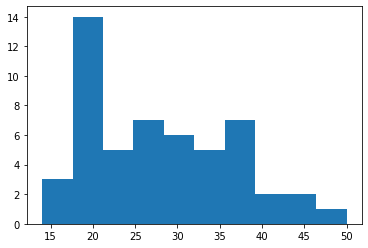

In [5]:
sz = np.empty(len(folder_list))
for n, i in enumerate(folder_list):
    with open(i + '/coord.txt') as f:
        for line in f:
            array = np.array([int(x) for x in line.split()])
            sz[n] = array[2]
plot = plt.hist(sz)